In [ ]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 48.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import scipy.sparse as sparse

from networkx.algorithms import community as nx_comm
from itertools import combinations
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from implicit.als import AlternatingLeastSquares


In [ ]:
df_x = pd.read_csv("x_train_Meacfjr.csv", delimiter=",", quotechar='"')

# Convert 'job_ids' and 'actions' from strings to actual lists
df_x["job_ids"] = df_x["job_ids"].apply(ast.literal_eval)
df_x["actions"] = df_x["actions"].apply(ast.literal_eval)

print(df_x.head(10))


   session_id                                      job_ids  \
0           0     [305, 299, 300, 290, 282, 274, 264, 261]   
1           1                          [84, 257, 252, 250]   
2           2          [241, 237, 221, 309, 310, 306, 301]   
3           3     [303, 297, 296, 298, 294, 295, 292, 293]   
4           4               [171, 291, 289, 166, 288, 155]   
5           5                         [286, 144, 284, 285]   
6           6                         [131, 283, 281, 279]   
7           7                              [277, 280, 275]   
8           8               [276, 272, 273, 270, 269, 230]   
9           9  [267, 268, 29, 103, 262, 263, 88, 260, 258]   

                                             actions  
0   [view, view, view, view, view, view, view, view]  
1                           [view, view, view, view]  
2    [view, view, apply, apply, apply, apply, apply]  
3  [apply, apply, apply, apply, apply, apply, app...  
4         [apply, apply, apply, apply, app

In [ ]:
# Load the dataset without applying ast.literal_eval()
df_y = pd.read_csv("y_train_SwJNMSu.csv", delimiter=",", quotechar='"')

# Display the first 10 rows
print(df_y.head(10))

   session_id  job_id action
0           0      84   view
1           1     241   view
2           2     303  apply
3           3     171  apply
4           4     286  apply
5           5     131  apply
6           6     277  apply
7           7     276  apply
8           8     267  apply
9           9     259  apply


In [ ]:
df_test = pd.read_csv("x_test_jCBBNP2.csv", delimiter=",", quotechar='"')

# Convert 'job_ids' and 'actions' from strings to actual lists
df_test["job_ids"] = df_test["job_ids"].apply(ast.literal_eval)
df_test["actions"] = df_test["actions"].apply(ast.literal_eval)

print(df_test.head(10))

   session_id                                            job_ids  \
0           0  [2393, 4794, 4822, 5160, 4229, 4951, 2188, 339...   
1           1  [1867, 2490, 3967, 2467, 5270, 4547, 4205, 223...   
2           2                                  [2449, 4317, 792]   
3           3  [4304, 2957, 3259, 2379, 2385, 357, 2908, 2241...   
4           4                 [2672, 2521, 3061, 783, 1512, 868]   
5           5  [1301, 663, 708, 105, 501, 497, 514, 701, 846,...   
6           6         [908, 2531, 700, 1836, 1157, 621, 653, 14]   
7           7                     [4451, 1785, 1885, 2263, 3014]   
8           8  [1902, 745, 504, 272, 433, 1136, 966, 3143, 30...   
9           9  [2231, 36, 929, 566, 2930, 2769, 1590, 1838, 2...   

                                             actions  
0  [view, view, view, view, view, view, view, vie...  
1  [view, view, view, view, view, apply, apply, a...  
2                                 [view, view, view]  
3  [view, view, view, apply, vi

## Analysis of the dataset

In [ ]:
# Check for missing values in each column
print(df_x.isnull().sum())  # For x_train dataset
print(df_y.isnull().sum())  # For y_train dataset


session_id    0
job_ids       0
actions       0
dtype: int64
session_id    0
job_id        0
action        0
dtype: int64


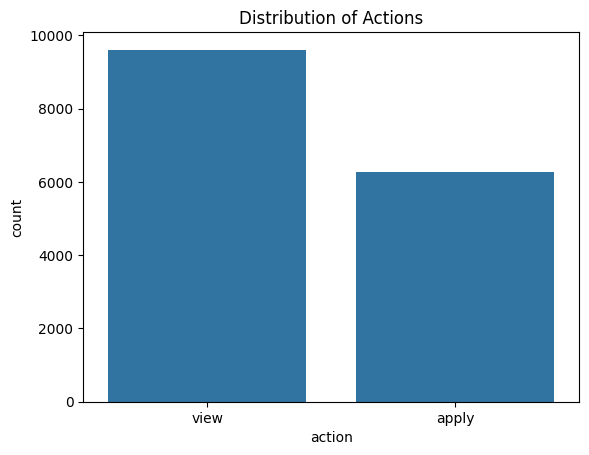

In [ ]:
# Distribution of actions
sns.countplot(x='action', data=df_y)
plt.title('Distribution of Actions')
plt.show()

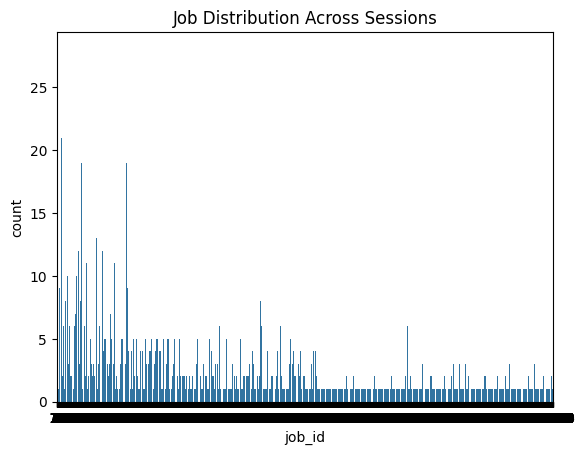

In [ ]:
# Distribution of job_id across session_id
sns.countplot(x='job_id', data=df_y)
plt.title('Job Distribution Across Sessions')
plt.show()


In [ ]:
# Exploding job_ids and actions columns
df_exploded = df_x.explode(['job_ids', 'actions'], ignore_index=True)

# Print the transformed dataframe
print(df_exploded)

        session_id job_ids actions
0                0     305    view
1                0     299    view
2                0     300    view
3                0     290    view
4                0     282    view
...            ...     ...     ...
119742       15880   27232    view
119743       15880   27231    view
119744       15881   27253    view
119745       15881   27252    view
119746       15881   27251    view

[119747 rows x 3 columns]


In [ ]:

# ============================================================
# 0. Load Data
# ============================================================
# Update the paths below to match your data files.
df_x = pd.read_csv('/content/x_train_Meacfjr.csv')
df_y = pd.read_csv('/content/y_train_SwJNMSu.csv')

# Convert string representation of lists into actual lists
df_x["job_ids"] = df_x["job_ids"].apply(ast.literal_eval)
df_x["actions"] = df_x["actions"].apply(ast.literal_eval)


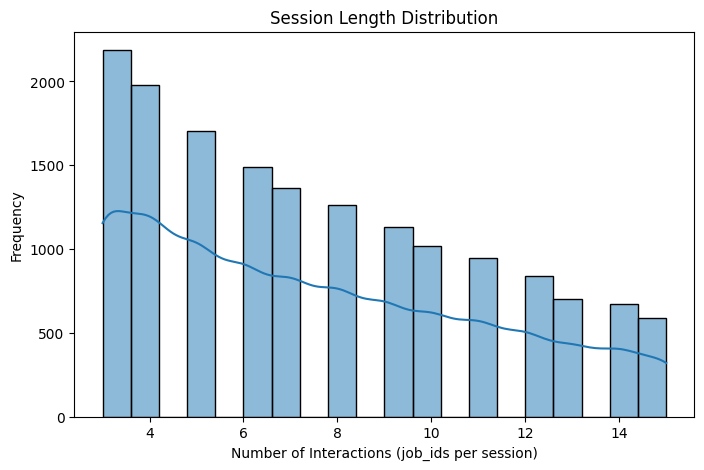

<ipython-input-26-7852cedcc8c4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='pastel')


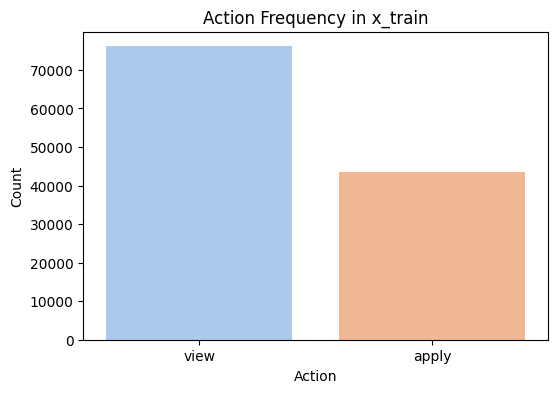

<ipython-input-26-7852cedcc8c4>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')


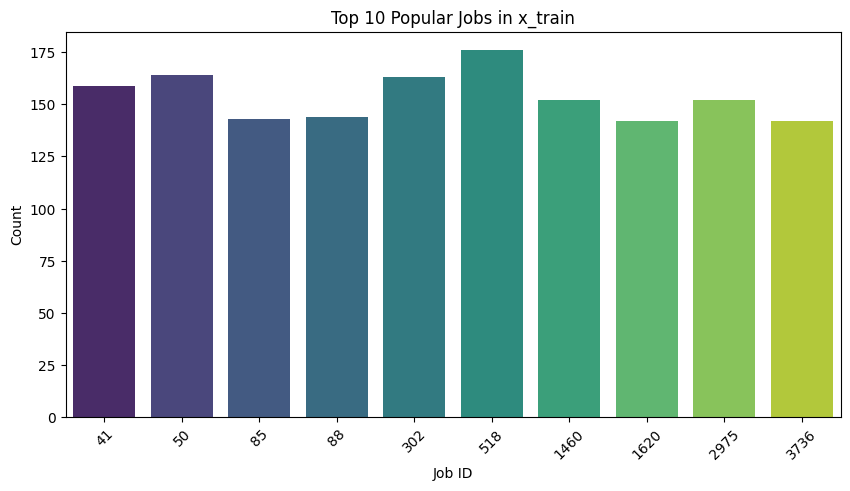

<ipython-input-26-7852cedcc8c4>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts_y.index, y=job_counts_y.values, palette='magma')


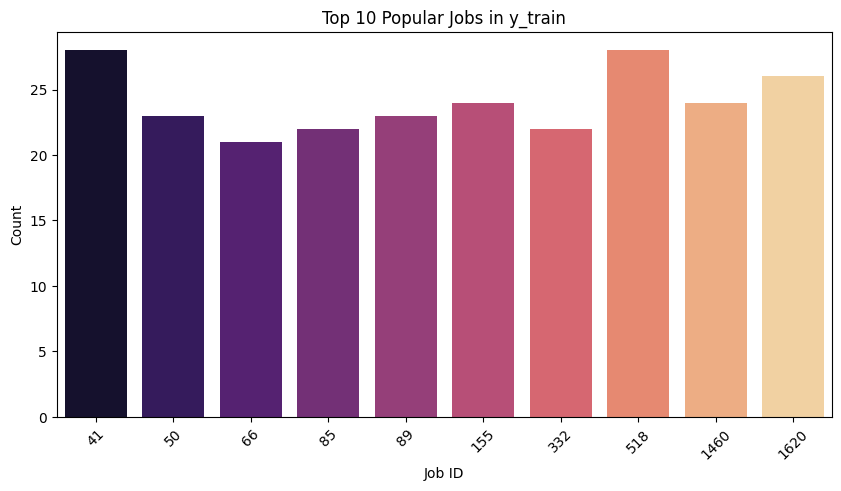

Top 20 co-occurring job pairs:
       job1  job2  count
11051   465  1620     40
14340    41   905     38
3702   1709  2338     37
621     319   320     36
24202  1620  2497     35
40225    85    89     35
651     302   312     35
7326    412   441     34
24547   938  1620     33
5461    302  1620     32
5459    441  1620     32
24198    10  2497     31
29167    41   910     30
17310    41  1460     29
14473    10  1620     28
692     312   313     28
22023   412  1620     28
6798    621   758     28
24233    10   302     27
7322    441  1617     27


In [ ]:
# ============================================================
# 1. Exploratory Data Analysis (EDA)
# ============================================================

## 1.1 Session Characteristics: Session Length Distribution
df_x['session_length'] = df_x['job_ids'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df_x['session_length'], bins=20, kde=True)
plt.title("Session Length Distribution")
plt.xlabel("Number of Interactions (job_ids per session)")
plt.ylabel("Frequency")
plt.show()

## 1.2 Action Distribution: Frequency of “view” vs “apply”
# Flatten the list of actions
all_actions = [action for actions in df_x['actions'] for action in actions]
action_counts = pd.Series(all_actions).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=action_counts.index, y=action_counts.values, palette='pastel')
plt.title("Action Frequency in x_train")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()

## 1.3 Job Interaction Analysis: Popular Jobs
# For x_train: Count how many times each job appears across all sessions
all_jobs = [job for jobs in df_x['job_ids'] for job in jobs]
job_counts = pd.Series(all_jobs).value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title("Top 10 Popular Jobs in x_train")
plt.xlabel("Job ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# For y_train: Count the target job frequencies
job_counts_y = df_y['job_id'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=job_counts_y.index, y=job_counts_y.values, palette='magma')
plt.title("Top 10 Popular Jobs in y_train")
plt.xlabel("Job ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 1.4 Co-occurrence Analysis: Job Co-Interactions
# For each session, count each unique pair of job interactions.
co_occurrence = {}
for jobs in df_x['job_ids']:
    unique_jobs = list(set(jobs))
    for pair in combinations(unique_jobs, 2):
        pair = tuple(sorted(pair))
        co_occurrence[pair] = co_occurrence.get(pair, 0) + 1

co_occurrence_df = pd.DataFrame([{'job1': k[0], 'job2': k[1], 'count': v} for k, v in co_occurrence.items()])
top_pairs = co_occurrence_df.sort_values('count', ascending=False).head(20)
print("Top 20 co-occurring job pairs:")
print(top_pairs)


Sample Session ID: 0
Job Sequence: [305, 299, 300, 290, 282, 274, 264, 261]
Action Sequence: ['view', 'view', 'view', 'view', 'view', 'view', 'view', 'view']


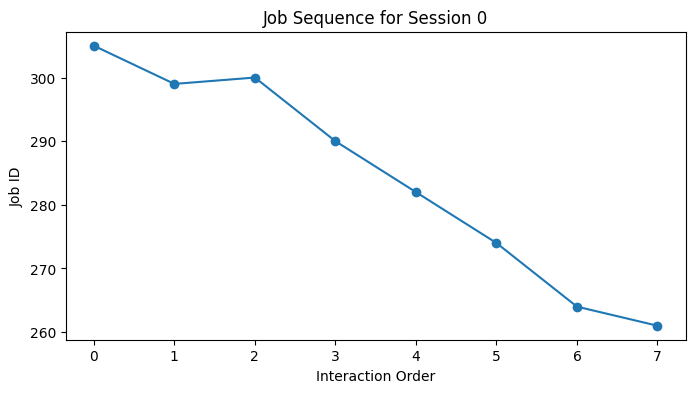

In [ ]:
# ============================================================
# 2. Sequential and Temporal Analysis
# ============================================================
# Example: Display and plot the order of interactions for a sample session.
sample_session = df_x.iloc[0]
print("\nSample Session ID:", sample_session['session_id'])
print("Job Sequence:", sample_session['job_ids'])
print("Action Sequence:", sample_session['actions'])

# Plot the job sequence (using indices as x-axis since job IDs may be non-numeric)
plt.figure(figsize=(8, 4))
plt.plot(range(len(sample_session['job_ids'])), sample_session['job_ids'], marker='o')
plt.title(f"Job Sequence for Session {sample_session['session_id']}")
plt.xlabel("Interaction Order")
plt.ylabel("Job ID")
plt.xticks(range(len(sample_session['job_ids'])))
plt.show()

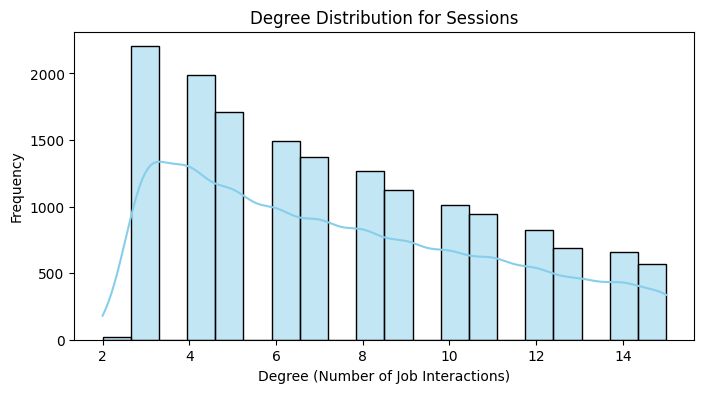

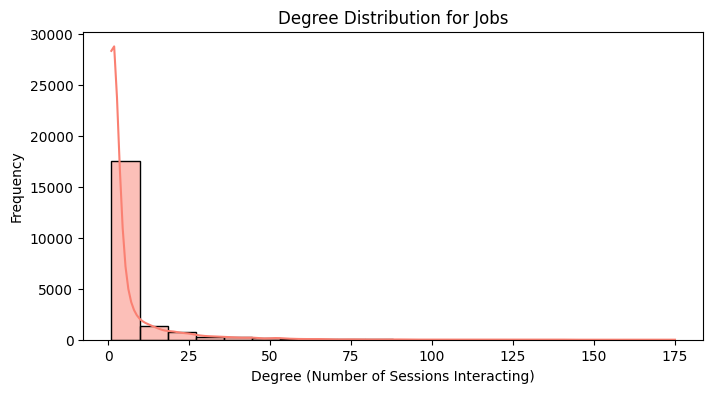

KeyboardInterrupt: 

In [ ]:
# ============================================================
# 3. Graph and Network Analysis
# ============================================================
## 3.1 Build a Bipartite Graph (Sessions and Jobs)
B = nx.Graph()

# To avoid ID collisions, prefix session IDs with 's_' and job IDs with 'j_'
for _, row in df_x.iterrows():
    session_node = f"s_{row['session_id']}"
    B.add_node(session_node, bipartite=0)
    for job in row['job_ids']:
        job_node = f"j_{job}"
        B.add_node(job_node, bipartite=1)
        B.add_edge(session_node, job_node)

# Degree distributions
session_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
job_nodes = set(B) - session_nodes

session_degrees = [B.degree(n) for n in session_nodes]
job_degrees = [B.degree(n) for n in job_nodes]

plt.figure(figsize=(8, 4))
sns.histplot(session_degrees, kde=True, bins=20, color='skyblue')
plt.title("Degree Distribution for Sessions")
plt.xlabel("Degree (Number of Job Interactions)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(job_degrees, kde=True, bins=20, color='salmon')
plt.title("Degree Distribution for Jobs")
plt.xlabel("Degree (Number of Sessions Interacting)")
plt.ylabel("Frequency")
plt.show()

## 3.2 Community Detection using Girvan-Newman Algorithm
# Note: Girvan-Newman can be computationally intensive for large graphs.
comp = nx_comm.girvan_newman(B)
first_level_communities = tuple(sorted(c) for c in next(comp))
print("\nDetected communities (first level) using Girvan-Newman:")
for i, community in enumerate(first_level_communities):
    print(f"Community {i+1}: {community}")


In [ ]:
# Alternative community detection using Greedy Modularity
communities = nx_comm.greedy_modularity_communities(B)

print("\nDetected communities using Greedy Modularity:")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")


Detected communities using Greedy Modularity:
Community 1: frozenset({'j_16951', 's_15210', 'j_18422', 's_15492', 's_14629', 's_14234', 'j_26128', 'j_25280', 'j_19640', 's_14540', 'j_23862', 'j_18355', 'j_16894', 'j_20649', 's_14210', 'j_19277', 'j_23908', 'j_18341', 'j_23807', 'j_19527', 'j_25232', 'j_18879', 's_14379', 'j_22030', 'j_19071', 'j_27256', 'j_26489', 'j_18423', 'j_20867', 'j_25006', 's_14546', 'j_19479', 'j_22662', 'j_25000', 'j_20635', 'j_25898', 'j_15900', 's_15609', 's_14709', 's_13982', 'j_27016', 's_14275', 'j_25277', 'j_22794', 's_14755', 'j_21425', 'j_18133', 'j_26454', 'j_22820', 'j_23069', 'j_18876', 'j_19892', 'j_20026', 'j_16101', 's_13586', 'j_18791', 'j_23612', 's_14083', 's_15305', 'j_26199', 's_14985', 'j_25722', 'j_21914', 's_14973', 'j_22951', 'j_21882', 'j_26212', 's_13787', 'j_25852', 'j_26297', 'j_24467', 'j_19358', 's_14548', 'j_19462', 'j_24753', 'j_24714', 'j_17803', 'j_25166', 'j_24684', 's_15393', 's_15644', 'j_21599', 's_14803', 's_14976', 'j_16

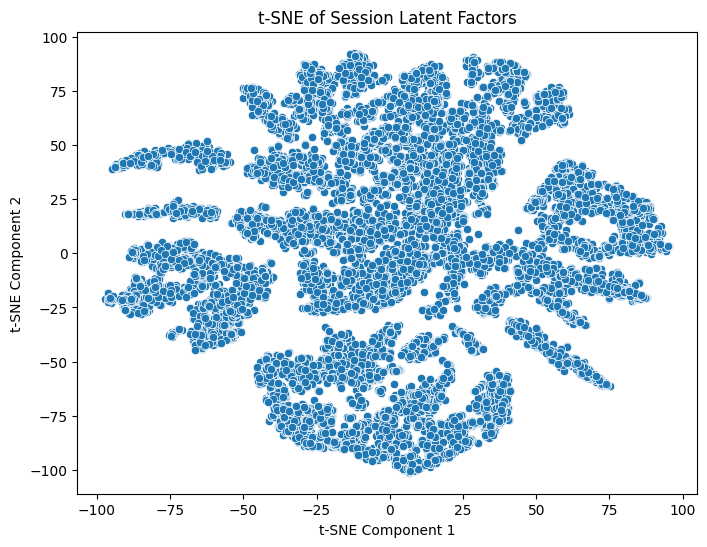


Silhouette Score for K-Means clustering (k=5): 0.5191


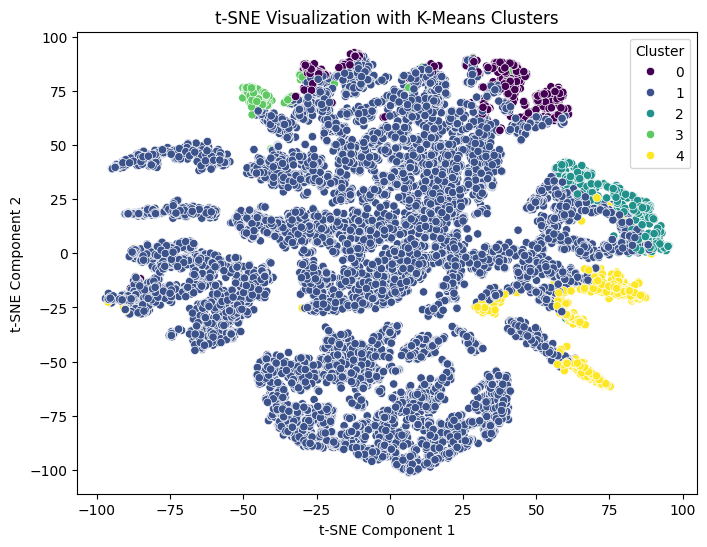

In [ ]:
# ============================================================
# 4. Latent Factor and Clustering Analysis
# ============================================================
## 4.1 Build the Interaction Matrix
def build_interaction_matrix(x_train, weight_map={'apply': 2, 'view': 1}):
    sessions = x_train['session_id'].unique()
    all_jobs = set()
    for jobs in x_train['job_ids']:
        all_jobs.update(jobs)
    all_jobs = list(all_jobs)

    session2idx = {s: i for i, s in enumerate(sessions)}
    job2idx = {j: i for i, j in enumerate(all_jobs)}

    matrix = np.zeros((len(sessions), len(all_jobs)))
    for _, row in x_train.iterrows():
        s_idx = session2idx[row['session_id']]
        for job, act in zip(row['job_ids'], row['actions']):
            j_idx = job2idx[job]
            matrix[s_idx, j_idx] += weight_map.get(act, 1)
    return matrix, session2idx, job2idx

interaction_matrix, session2idx, job2idx = build_interaction_matrix(df_x)

## 4.2 Matrix Factorization via SVD
n_components = 20
svd = TruncatedSVD(n_components=n_components, random_state=42)
user_factors = svd.fit_transform(interaction_matrix)  # Session latent factors
job_factors = svd.components_.T                       # Job latent factors

## 4.3 Visualize the Latent Space using t-SNE
tsne = TSNE(n_components=2, random_state=42)
user_tsne = tsne.fit_transform(user_factors)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=user_tsne[:, 0], y=user_tsne[:, 1])
plt.title("t-SNE of Session Latent Factors")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

## 4.4 K-Means Clustering on Session Latent Factors
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(user_factors)
sil_score = silhouette_score(user_factors, clusters)
print(f"\nSilhouette Score for K-Means clustering (k=5): {sil_score:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=user_tsne[:, 0], y=user_tsne[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title("t-SNE Visualization with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()


Logistic Regression Feature Coefficients:
total          0.047589
apply_count    0.271980
view_count    -0.224391
dtype: float64


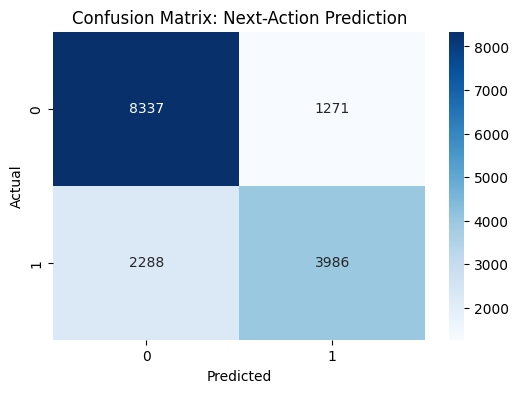

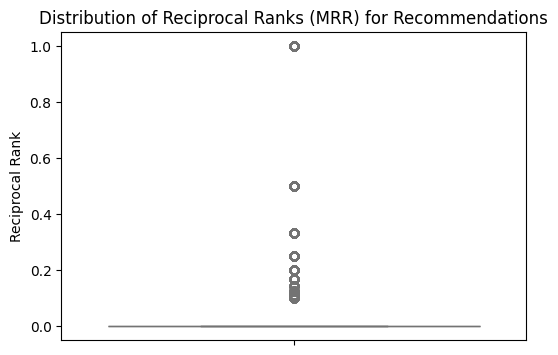

Mean Reciprocal Rank (MRR): 0.0284
Next-Action Prediction Accuracy: 0.7759


In [ ]:
# ============================================================
# 5. Predictive Model Analysis: Next-Action Prediction
# ============================================================
## 5.1 Feature Engineering: Build Session Features
def build_session_features(x_train):
    features = []
    session_ids = []
    for _, row in x_train.iterrows():
        s_id = row['session_id']
        total = len(row['actions'])
        count_apply = row['actions'].count('apply')
        count_view = row['actions'].count('view')
        features.append([total, count_apply, count_view])
        session_ids.append(s_id)
    feature_df = pd.DataFrame(features, columns=['total', 'apply_count', 'view_count'])
    feature_df['session_id'] = session_ids
    return feature_df

session_features = build_session_features(df_x)
data_model = pd.merge(session_features, df_y, on='session_id', how='inner')

# Prepare features and target (encode 'apply' as 1, 'view' as 0)
X = data_model[['total', 'apply_count', 'view_count']]
y = data_model['action'].apply(lambda x: 1 if x == 'apply' else 0)

# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

print("\nLogistic Regression Feature Coefficients:")
coeff_df = pd.Series(clf.coef_[0], index=X.columns)
print(coeff_df)

## 5.2 Error Analysis: Confusion Matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Next-Action Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 5.3 Evaluation Metric Analysis: Recommendation MRR
def predict_session(session_idx, user_factors, job_factors, interaction_matrix, top_n=10):
    scores = user_factors[session_idx].dot(job_factors.T)
    # Exclude already-interacted jobs
    scores[interaction_matrix[session_idx] > 0] = -np.inf
    top_indices = np.argsort(scores)[-top_n:][::-1]
    return top_indices

# Prepare mapping from job index back to job ID
idx2job = {i: j for j, i in job2idx.items()}

# Compute reciprocal ranks for each session in df_y
reciprocal_ranks = []
for _, row in df_y.iterrows():
    s_id = row['session_id']
    if s_id in session2idx:
        s_idx = session2idx[s_id]
        top_indices = predict_session(s_idx, user_factors, job_factors, interaction_matrix, top_n=10)
        recommended_jobs = [idx2job[i] for i in top_indices]
        # Calculate reciprocal rank
        try:
            rank = recommended_jobs.index(row['job_id']) + 1
            rr = 1.0 / rank
        except ValueError:
            rr = 0.0
        reciprocal_ranks.append(rr)

plt.figure(figsize=(6, 4))
sns.boxplot(y=reciprocal_ranks, color='lightgreen')
plt.title("Distribution of Reciprocal Ranks (MRR) for Recommendations")
plt.ylabel("Reciprocal Rank")
plt.show()

mrr = np.mean(reciprocal_ranks)
print(f"Mean Reciprocal Rank (MRR): {mrr:.4f}")

# Also, display next-action prediction accuracy
action_accuracy = accuracy_score(y, y_pred)
print(f"Next-Action Prediction Accuracy: {action_accuracy:.4f}")


User Segmentation (Session Behavior) Summary:
             total  apply_count  view_count   session_id
segment                                                 
0        10.306416     8.562754    1.743662  6470.522692
1        11.061722     1.016268   10.045455  8676.872010
2         4.770189     1.413659    3.356530  8130.760080


<ipython-input-31-7bd8d57955f8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segment', y='total', data=session_features, palette='Set3')


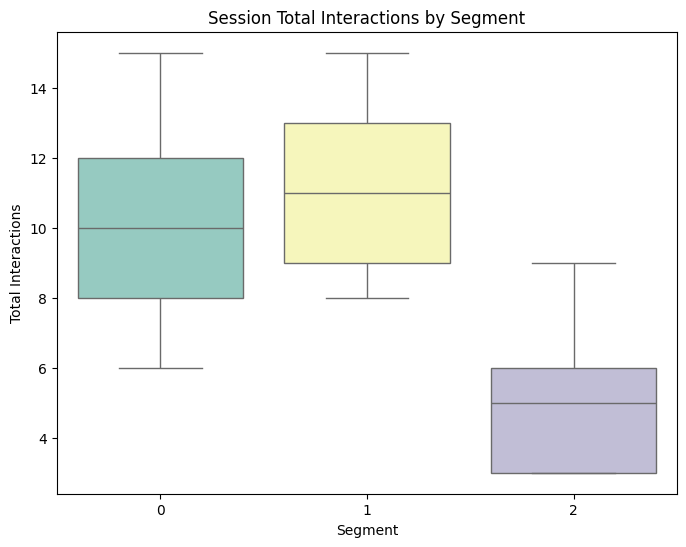

In [ ]:
# ============================================================
# 6. User Behavior Segmentation
# ============================================================
# Segment users based on session features
kmeans_seg = KMeans(n_clusters=3, random_state=42)
session_features['segment'] = kmeans_seg.fit_predict(session_features[['total', 'apply_count', 'view_count']])

print("\nUser Segmentation (Session Behavior) Summary:")
print(session_features.groupby('segment').mean())

plt.figure(figsize=(8, 6))
sns.boxplot(x='segment', y='total', data=session_features, palette='Set3')
plt.title("Session Total Interactions by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Interactions")
plt.show()

## Collaborative filtering


Evaluation Results:
  🔹 MRR Score: 0.0265
  🔹 Action Prediction Accuracy: 0.7759
  🔹 Final Score (70% MRR + 30% Accuracy): 0.2514


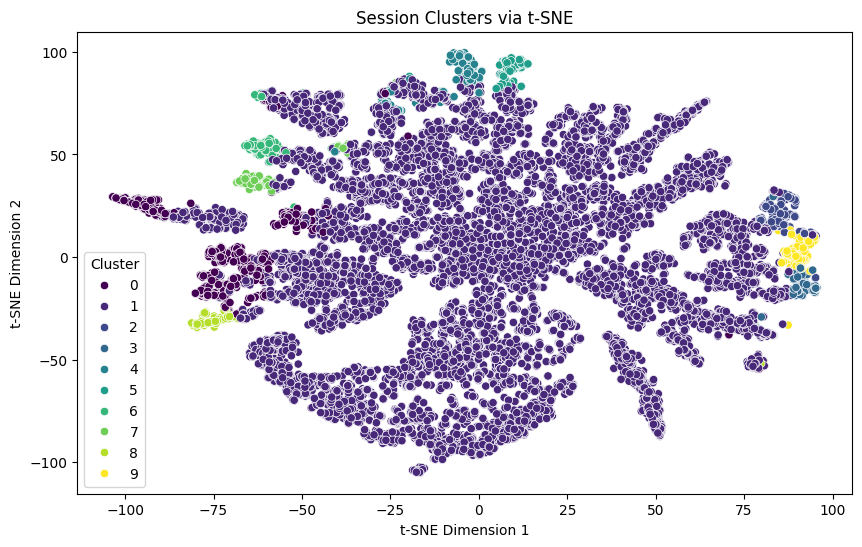

In [ ]:
# ---------------------------
# 2. Build the Interaction Matrix (Collaborative Filtering)
# ---------------------------
def build_interaction_matrix(x_train, weight_map={'apply': 5, 'view': 1}):
    """
    Create a user-item interaction matrix with weights based on action type.
    """
    sessions = x_train['session_id'].unique()

    # Extract unique job IDs
    all_jobs = set()
    for jobs in x_train['job_ids']:
        all_jobs.update(jobs)
    all_jobs = list(all_jobs)

    # Mapping dictionaries
    session2idx = {s: i for i, s in enumerate(sessions)}
    job2idx = {j: i for i, j in enumerate(all_jobs)}

    # Initialize interaction matrix
    matrix = np.zeros((len(sessions), len(all_jobs)))

    # Populate the matrix
    for _, row in x_train.iterrows():
        s_idx = session2idx[row['session_id']]
        for job, act in zip(row['job_ids'], row['actions']):
            j_idx = job2idx[job]
            matrix[s_idx, j_idx] += weight_map.get(act, 1)

    return matrix, session2idx, job2idx

interaction_matrix, session2idx, job2idx = build_interaction_matrix(df_x)

# ---------------------------
# 3. Apply SVD for Collaborative Filtering
# ---------------------------
n_components = 20
svd = TruncatedSVD(n_components=n_components, random_state=42)
user_factors = svd.fit_transform(interaction_matrix)  # Session representations
job_factors = svd.components_.T                      # Job representations

def predict_session(session_idx, user_factors, job_factors, interaction_matrix, top_n=10):
    """
    Generate top-N job recommendations for a given session.
    """
    scores = user_factors[session_idx].dot(job_factors.T)
    scores[interaction_matrix[session_idx] > 0] = -np.inf  # Exclude seen jobs
    top_indices = np.argsort(scores)[-top_n:][::-1]
    return top_indices

# ---------------------------
# 4. Next-Action Prediction (Logistic Regression)
# ---------------------------
def build_session_features(x_train):
    """
    Extract session-level features based on action history.
    """
    features = []
    session_ids = []

    for _, row in x_train.iterrows():
        s_id = row['session_id']
        actions = row['actions']
        features.append([len(actions), actions.count('apply'), actions.count('view')])
        session_ids.append(s_id)

    feature_df = pd.DataFrame(features, columns=['total', 'apply_count', 'view_count'])
    feature_df['session_id'] = session_ids
    return feature_df

session_features = build_session_features(df_x)
data = pd.merge(session_features, df_y, on='session_id', how='inner')

# Prepare features and labels
X = data[['total', 'apply_count', 'view_count']]
y = data['action'].apply(lambda x: 1 if x == 'apply' else 0)

# Train logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# ---------------------------
# 5. Generate Recommendations & Predictions
# ---------------------------
results = {}
idx2job = {i: j for j, i in job2idx.items()}

y_true_jobs = []  # Store actual next job interactions
y_pred_jobs = []  # Store predicted job lists

y_true_actions = []  # Store actual actions
y_pred_actions = []  # Store predicted actions

for _, row in df_y.iterrows():
    s_id = row['session_id']

    if s_id in session2idx:
        s_idx = session2idx[s_id]
        top_indices = predict_session(s_idx, user_factors, job_factors, interaction_matrix, top_n=10)
        recommended_jobs = [idx2job[i] for i in top_indices]

        # Store for MRR calculation
        y_true_jobs.append(row['job_id'])
        y_pred_jobs.append(recommended_jobs)

        # Predict next action (Fixed)
        feat = session_features[session_features['session_id'] == s_id][['total', 'apply_count', 'view_count']]
        if not feat.empty:
            predicted_action = clf.predict(feat)[0]  # No warnings
            predicted_action = 'apply' if predicted_action == 1 else 'view'
        else:
            predicted_action = 'view'  # Default fallback

        y_true_actions.append(row['action'])
        y_pred_actions.append(predicted_action)


# ---------------------------
# 6. Evaluation Metrics: MRR & Accuracy
# ---------------------------
def mean_reciprocal_rank(y_true, y_pred, k=10):
    """
    Compute Mean Reciprocal Rank (MRR) at K.
    """
    rr_sum = 0.0
    for true_job, pred_jobs in zip(y_true, y_pred):
        try:
            rank = pred_jobs.index(true_job) + 1
            rr_sum += 1.0 / rank
        except ValueError:
            rr_sum += 0.0  # Not in top-k

    return rr_sum / len(y_true)

def compute_final_score(mrr, accuracy):
    """
    Compute the final score as:
      70% MRR + 30% Accuracy
    """
    return (0.7 * mrr) + (0.3 * accuracy)

# Calculate MRR
mrr_score = mean_reciprocal_rank(y_true_jobs, y_pred_jobs)

# Calculate Accuracy
action_accuracy = accuracy_score([1 if x == 'apply' else 0 for x in y_true_actions],
                                 [1 if x == 'apply' else 0 for x in y_pred_actions])

# Compute final weighted score
final_score = compute_final_score(mrr_score, action_accuracy)

print("\nEvaluation Results:")
print(f"  🔹 MRR Score: {mrr_score:.4f}")
print(f"  🔹 Action Prediction Accuracy: {action_accuracy:.4f}")
print(f"  🔹 Final Score (70% MRR + 30% Accuracy): {final_score:.4f}")

# ---------------------------
# 7. Clustering & Visualization
# ---------------------------
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
session_clusters = kmeans.fit_predict(user_factors)

session_cluster_df = pd.DataFrame({'session_id': list(session2idx.keys()), 'cluster': session_clusters})
session_plot_df = pd.merge(session_features, session_cluster_df, on='session_id')

tsne = TSNE(n_components=2, random_state=42)
user_tsne = tsne.fit_transform(user_factors)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_tsne[:, 0], y=user_tsne[:, 1], hue=session_clusters, palette='viridis', legend='full')
plt.title("Session Clusters via t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()



Evaluation Results:
  🔹 MRR Score: 0.0357
  🔹 Action Prediction Accuracy: 0.7759
  🔹 Final Score (70% MRR + 30% Accuracy): 0.2577


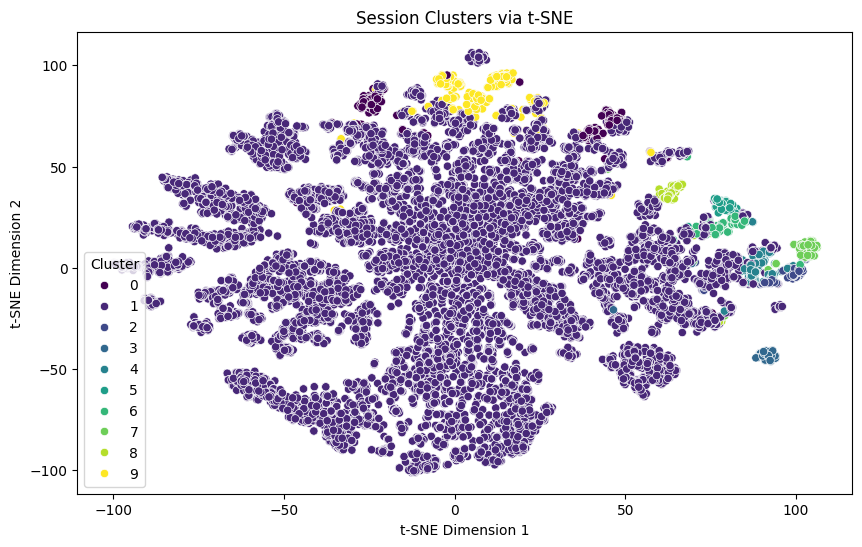

In [ ]:

# ---------------------------
# 2. Build the Interaction Matrix (Collaborative Filtering)
# ---------------------------
def build_interaction_matrix(x_train, weight_map={'apply': 5, 'view': 1}):
    """
    Create a user-item interaction matrix with weights based on action type.
    """
    sessions = x_train['session_id'].unique()

    # Extract unique job IDs
    all_jobs = set()
    for jobs in x_train['job_ids']:
        all_jobs.update(jobs)
    all_jobs = list(all_jobs)

    # Mapping dictionaries
    session2idx = {s: i for i, s in enumerate(sessions)}
    job2idx = {j: i for i, j in enumerate(all_jobs)}

    # Initialize interaction matrix
    matrix = np.zeros((len(sessions), len(all_jobs)))

    # Populate the matrix
    for _, row in x_train.iterrows():
        s_idx = session2idx[row['session_id']]
        for job, act in zip(row['job_ids'], row['actions']):
            j_idx = job2idx[job]
            matrix[s_idx, j_idx] += weight_map.get(act, 1)

    return matrix, session2idx, job2idx

interaction_matrix, session2idx, job2idx = build_interaction_matrix(df_x)

# ---------------------------
# 3. Apply SVD for Collaborative Filtering
# ---------------------------
n_components = 50
svd = TruncatedSVD(n_components=n_components, random_state=42)
user_factors = svd.fit_transform(interaction_matrix)  # Session representations
job_factors = svd.components_.T                      # Job representations

def predict_session(session_idx, user_factors, job_factors, interaction_matrix, top_n=10):
    """
    Generate top-N job recommendations for a given session.
    """
    scores = user_factors[session_idx].dot(job_factors.T)
    scores[interaction_matrix[session_idx] > 0] = -np.inf  # Exclude seen jobs
    top_indices = np.argsort(scores)[-top_n:][::-1]
    return top_indices

# ---------------------------
# 4. Next-Action Prediction (Logistic Regression)
# ---------------------------
def build_session_features(x_train):
    """
    Extract session-level features based on action history.
    """
    features = []
    session_ids = []

    for _, row in x_train.iterrows():
        s_id = row['session_id']
        actions = row['actions']
        features.append([len(actions), actions.count('apply'), actions.count('view')])
        session_ids.append(s_id)

    feature_df = pd.DataFrame(features, columns=['total', 'apply_count', 'view_count'])
    feature_df['session_id'] = session_ids
    return feature_df

session_features = build_session_features(df_x)
data = pd.merge(session_features, df_y, on='session_id', how='inner')

# Prepare features and labels
X = data[['total', 'apply_count', 'view_count']]
y = data['action'].apply(lambda x: 1 if x == 'apply' else 0)

# Train logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# ---------------------------
# 5. Generate Recommendations & Predictions
# ---------------------------
results = {}
idx2job = {i: j for j, i in job2idx.items()}

y_true_jobs = []  # Store actual next job interactions
y_pred_jobs = []  # Store predicted job lists

y_true_actions = []  # Store actual actions
y_pred_actions = []  # Store predicted actions

for _, row in df_y.iterrows():
    s_id = row['session_id']

    if s_id in session2idx:
        s_idx = session2idx[s_id]
        top_indices = predict_session(s_idx, user_factors, job_factors, interaction_matrix, top_n=10)
        recommended_jobs = [idx2job[i] for i in top_indices]

        # Store for MRR calculation
        y_true_jobs.append(row['job_id'])
        y_pred_jobs.append(recommended_jobs)

        # Predict next action (Fixed)
        feat = session_features[session_features['session_id'] == s_id][['total', 'apply_count', 'view_count']]
        if not feat.empty:
            predicted_action = clf.predict(feat)[0]  # No warnings
            predicted_action = 'apply' if predicted_action == 1 else 'view'
        else:
            predicted_action = 'view'  # Default fallback

        y_true_actions.append(row['action'])
        y_pred_actions.append(predicted_action)


# ---------------------------
# 6. Evaluation Metrics: MRR & Accuracy
# ---------------------------
def mean_reciprocal_rank(y_true, y_pred, k=10):
    """
    Compute Mean Reciprocal Rank (MRR) at K.
    """
    rr_sum = 0.0
    for true_job, pred_jobs in zip(y_true, y_pred):
        try:
            rank = pred_jobs.index(true_job) + 1
            rr_sum += 1.0 / rank
        except ValueError:
            rr_sum += 0.0  # Not in top-k

    return rr_sum / len(y_true)

def compute_final_score(mrr, accuracy):
    """
    Compute the final score as:
      70% MRR + 30% Accuracy
    """
    return (0.7 * mrr) + (0.3 * accuracy)

# Calculate MRR
mrr_score = mean_reciprocal_rank(y_true_jobs, y_pred_jobs)

# Calculate Accuracy
action_accuracy = accuracy_score([1 if x == 'apply' else 0 for x in y_true_actions],
                                 [1 if x == 'apply' else 0 for x in y_pred_actions])

# Compute final weighted score
final_score = compute_final_score(mrr_score, action_accuracy)

print("\nEvaluation Results:")
print(f"  🔹 MRR Score: {mrr_score:.4f}")
print(f"  🔹 Action Prediction Accuracy: {action_accuracy:.4f}")
print(f"  🔹 Final Score (70% MRR + 30% Accuracy): {final_score:.4f}")

# ---------------------------
# 7. Clustering & Visualization
# ---------------------------
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
session_clusters = kmeans.fit_predict(user_factors)

session_cluster_df = pd.DataFrame({'session_id': list(session2idx.keys()), 'cluster': session_clusters})
session_plot_df = pd.merge(session_features, session_cluster_df, on='session_id')

tsne = TSNE(n_components=2, random_state=42)
user_tsne = tsne.fit_transform(user_factors)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_tsne[:, 0], y=user_tsne[:, 1], hue=session_clusters, palette='viridis', legend='full')
plt.title("Session Clusters via t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
!pip install plotly --quiet

In [ ]:
import plotly.express as px

# Assuming user_factors and session_clusters have been computed previously.
tsne_3d = TSNE(n_components=3, random_state=42)
user_tsne_3d = tsne_3d.fit_transform(user_factors)

# Create a DataFrame for Plotly
df_plot = pd.DataFrame(user_tsne_3d, columns=['Dim1', 'Dim2', 'Dim3'])
df_plot['cluster'] = session_clusters

fig = px.scatter_3d(df_plot, x='Dim1', y='Dim2', z='Dim3', color='cluster',
                    title='Session Clusters via 3D t-SNE (Interactive)')
fig.show()


Collaborative filtering (alterações):
- Normalização da matriz de interação
- Alternating Least Squares (ALS) no lugar do SVD
- Regularização L2

In [ ]:
# -----------------------------------------
# 2. Build the Interaction Matrix
# -----------------------------------------
def build_interaction_matrix(x_train, weight_map={'apply': 5, 'view': 1}):
    """
    Build a user-item interaction matrix with weights based on action type.
    """
    sessions = x_train['session_id'].unique()
    # Gather all unique job IDs from the sessions
    all_jobs = set()
    for jobs in x_train['job_ids']:
        all_jobs.update(jobs)
    all_jobs = list(all_jobs)

    # Create mapping dictionaries for sessions and jobs
    session2idx = {s: i for i, s in enumerate(sessions)}
    job2idx = {j: i for i, j in enumerate(all_jobs)}

    # Initialize the interaction matrix (shape: [# sessions, # jobs])
    matrix = np.zeros((len(sessions), len(all_jobs)))

    # Populate the matrix with weighted interactions
    for _, row in x_train.iterrows():
        s_idx = session2idx[row['session_id']]
        for job, act in zip(row['job_ids'], row['actions']):
            j_idx = job2idx[job]
            matrix[s_idx, j_idx] += weight_map.get(act, 1)

    return matrix, session2idx, job2idx

interaction_matrix, session2idx, job2idx = build_interaction_matrix(df_x)

# -----------------------------------------
# 3. Normalize the Interaction Matrix
# -----------------------------------------
# Apply L2 normalization to each session's interaction vector
normalized_matrix = normalize(interaction_matrix, norm='l2', axis=1)
# Convert the normalized matrix to a sparse CSR matrix for efficiency with ALS
sparse_matrix = sparse.csr_matrix(normalized_matrix)

# -----------------------------------------
# 4. Apply ALS with L2 Regularization
# -----------------------------------------
# The implicit library expects an item-user matrix, so we transpose our matrix.
sparse_item_user = sparse_matrix.T

# Initialize the ALS model:
als_model = AlternatingLeastSquares(
    factors=20,         # Number of latent factors
    regularization=0.1, # L2 regularization strength
    iterations=20,      # Number of training iterations
    use_gpu=False       # Set True if using a compatible GPU
)

# Fit the model on the transposed (item-user) sparse matrix
als_model.fit(sparse_item_user)

# Retrieve the learned factors
user_factors_als = als_model.user_factors   # Latent factors for sessions
job_factors_als = als_model.item_factors      # Latent factors for jobs

# Build inverse mapping from job index to job ID
idx2job = {i: j for j, i in job2idx.items()}

def recommend_jobs_als(user_id, als_model, sparse_matrix, session2idx, idx2job, N=10):
    """
    Recommend N jobs for a given user (session) using the ALS model.
    The implicit library's 'recommend' function filters out items already interacted with.
    """
    if user_id not in session2idx:
        return []
    user_idx = session2idx[user_id]
    recommendations = als_model.recommend(user_idx, sparse_matrix, N=N, filter_already_liked_items=True)
    return [idx2job[item_idx] for item_idx, score in recommendations]

# -----------------------------------------
# 5. Next-Action Prediction (Logistic Regression)
# -----------------------------------------
def build_session_features(x_train):
    """
    Extract session-level features:
      - total interactions
      - count of 'apply'
      - count of 'view'
    """
    features = []
    session_ids = []
    for _, row in x_train.iterrows():
        s_id = row['session_id']
        actions = row['actions']
        total = len(actions)
        count_apply = actions.count('apply')
        count_view = actions.count('view')
        features.append([total, count_apply, count_view])
        session_ids.append(s_id)
    feature_df = pd.DataFrame(features, columns=['total', 'apply_count', 'view_count'])
    feature_df['session_id'] = session_ids
    return feature_df

session_features = build_session_features(df_x)
# Merge session features with target action from df_y
data = pd.merge(session_features, df_y, on='session_id', how='inner')
X = data[['total', 'apply_count', 'view_count']]
y = data['action'].apply(lambda x: 1 if x == 'apply' else 0)

# Train logistic regression for next-action prediction
clf = LogisticRegression()
clf.fit(X, y)

# -----------------------------------------
# 6. Generate Recommendations & Predictions
# -----------------------------------------
results = {}
y_true_jobs = []    # Actual next job (from df_y)
y_pred_jobs = []    # ALS recommended top-10 job list
y_true_actions = [] # Actual next action
y_pred_actions = [] # Predicted next action

for _, row in df_y.iterrows():
    s_id = row['session_id']
    if s_id in session2idx:
        # Get ALS recommendations
        rec_jobs = recommend_jobs_als(s_id, als_model, sparse_matrix, session2idx, idx2job, N=10)
        y_true_jobs.append(row['job_id'])
        y_pred_jobs.append(rec_jobs)

        # Predict next action using logistic regression
        feat = session_features[session_features['session_id'] == s_id][['total', 'apply_count', 'view_count']]
        if not feat.empty:
            pred_action = clf.predict(feat)[0]
            pred_action = 'apply' if pred_action == 1 else 'view'
        else:
            pred_action = 'view'
        y_true_actions.append(row['action'])
        y_pred_actions.append(pred_action)
        results[s_id] = {'recommended_jobs': rec_jobs, 'predicted_action': pred_action}

# -----------------------------------------
# 7. Evaluation Metrics: MRR & Accuracy
# -----------------------------------------
def mean_reciprocal_rank(y_true, y_pred, k=10):
    """
    Compute Mean Reciprocal Rank (MRR) at k.
    """
    rr_sum = 0.0
    for true_job, pred_jobs in zip(y_true, y_pred):
        try:
            rank = pred_jobs.index(true_job) + 1
            rr_sum += 1.0 / rank
        except ValueError:
            rr_sum += 0.0
    return rr_sum / len(y_true)

def compute_final_score(mrr, accuracy):
    """
    Final score: 70% MRR + 30% Accuracy.
    """
    return (0.7 * mrr) + (0.3 * accuracy)

mrr_score = mean_reciprocal_rank(y_true_jobs, y_pred_jobs)
action_accuracy = accuracy_score([1 if x=='apply' else 0 for x in y_true_actions],
                                 [1 if x=='apply' else 0 for x in y_pred_actions])
final_score = compute_final_score(mrr_score, action_accuracy)

print("\nEvaluation Results:")
print(f"  MRR Score: {mrr_score:.4f}")
print(f"  Action Prediction Accuracy: {action_accuracy:.4f}")
print(f"  Final Score (70% MRR + 30% Accuracy): {final_score:.4f}")

# -----------------------------------------
# 8. Clustering & Visualization
# -----------------------------------------
# Cluster the sessions using the ALS user factors
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
session_clusters = kmeans.fit_predict(user_factors_als)

# Create a DataFrame for cluster labels and merge with session features
session_cluster_df = pd.DataFrame({'session_id': list(session2idx.keys()), 'cluster': session_clusters})
session_plot_df = pd.merge(session_features, session_cluster_df, on='session_id')

# Reduce dimensionality of user factors to 2D with t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
user_tsne = tsne.fit_transform(user_factors_als)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_tsne[:, 0], y=user_tsne[:, 1], hue=session_clusters, palette='viridis', legend='full')
plt.title("Session Clusters via t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()


/usr/local/lib/python3.11/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
/usr/local/lib/python3.11/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.008447885513305664 seconds
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

ValueError: user_items must contain 1 row for every user in userids